# VO1 Zufallszahlen

In [243]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm_notebook as tqdm

import urllib.request
import json

## Helper functions

In [221]:
def plot_interval(x, start_lim = 1000, interval = 100):
    end_lim = start_lim + interval
    plt.plot(np.arange(len(x[start_lim:end_lim])), x[start_lim:end_lim])
    plt.show()

In [235]:
def show_linear_dependency(x, start_lim = 1000, interval = 100):
    print("starting show_linear_dependency plot")
    end_lim = start_lim + interval
    plt.scatter(x[:-1], x[1:])
    plt.show()

## Lineare Kongruenz

a (multiplier): 15
c (increment): 0
m (modulus): 4294967296


0 15
1 225
2 3375
3 50625
4 759375
5 11390625
6 170859375
7 2562890625
8 4083621007
9 1124772961
max(x): 4294935215, min(x): 15


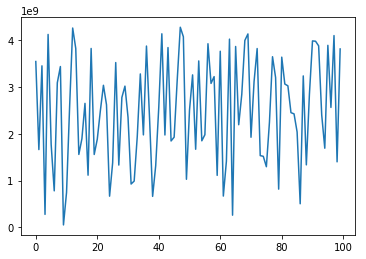

starting show_linear_dependency plot


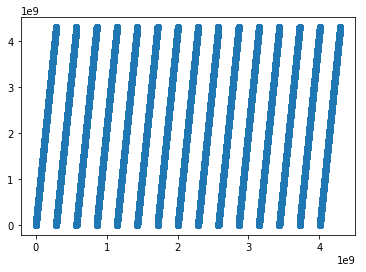

In [236]:
a = 2**4-1 # 2**16-1
c = 0
m = 2**32 # 2**32-1

print("a (multiplier): %i" % a)
print("c (increment): %i" % c)
print("m (modulus): %i" % m)

random_num = 1
x = []
period_num = 0

for i in tqdm(range(100000)):
    random_num = (random_num*a+c)%m
    x.append(random_num)
    if(i < 10):
        print(i, random_num)
    if(i == 100):
        period_num = random_num
    if(i > 100 and period_num == random_num):
        print("period is: %i" % (i-100))
        
print("max(x): %i, min(x): %i" % (max(x), min(x)))
plot_interval(x)

show_linear_dependency(x)
# holy shit, hyperplanes visible

### Periods can be very small!

The period is m−1 if the multiplier a is chosen to be a primitive element of the integers modulo m.

a (multiplier): 2
c (increment): 0
m (modulus): 11


0 2
1 4
2 8
3 5
4 10
5 9
6 7
7 3
8 6
9 1
period is: 10
period should be m-1: 10
max(x): 10, min(x): 1


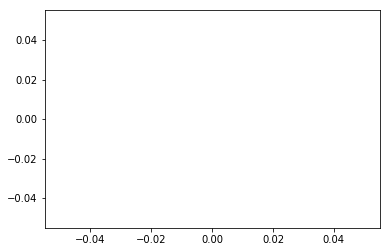

starting show_linear_dependency plot


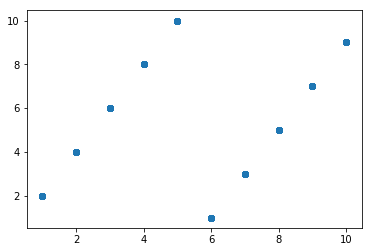

In [238]:
a = 2
c = 0
m = 11

print("a (multiplier): %i" % a)
print("c (increment): %i" % c)
print("m (modulus): %i" % m)

random_num = 1
x = []
period_num = 0
shown_period = False

for i in tqdm(range(1000)):
    random_num = (random_num*a+c)%m
    x.append(random_num)
    if(i < 10):
        print(i, random_num)
    if(i == 10):
        period_num = random_num
    if(i > 10 and period_num == random_num and shown_period == False):
        print("period is: %i" % (i-10))
        print("period should be m-1: %i" % (m-1))
        shown_period = True
        
print("max(x): %i, min(x): %i" % (max(x), min(x)))
plot_interval(x)
show_linear_dependency(x)

### RANDU -> a shit random number generator -> Pay attention to your parameters

a (multiplier): 65535
c (increment): 0
m (modulus): 4294967296


0 65535
1 4294836225
2 196607
3 4294705153
4 327679
5 4294574081
6 458751
7 4294443009
8 589823
9 4294311937
period is: 65536
max(x): 4294901759, min(x): 1


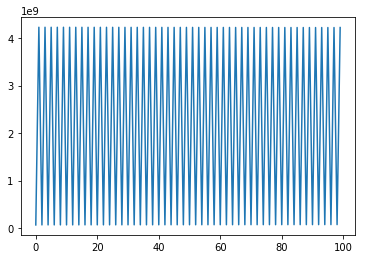

starting show_linear_dependency plot


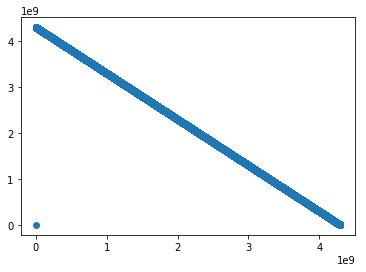

In [239]:
a = 2**16-1 # 2**16-1
c = 0
m = 2**32 # 2**32-1

print("a (multiplier): %i" % a)
print("c (increment): %i" % c)
print("m (modulus): %i" % m)

random_num = 1
x = []
for i in tqdm(range(100000)):
    random_num = (random_num*a+c)%m
    x.append(random_num)
    if(i < 10):
        print(i, random_num)
    if(i == 100):
        period_num = random_num
    if(i > 100 and period_num == random_num):
        print("period is: %i" % (i-100))

        
print("max(x): %i, min(x): %i" % (max(x), min(x)))
plot_interval(x)
show_linear_dependency(x)

## Fibonacci Generators

a (multiplier): 65535
c (increment): 0
m (modulus): 4096
418 1279


2 1697
3 2115
4 3812
5 1831
6 1547
7 3378
8 829
9 111
max(x): 4095, min(x): 1


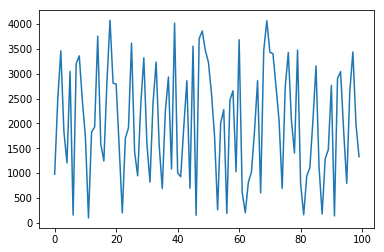

starting show_linear_dependency plot


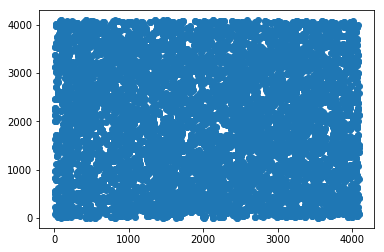

In [240]:
m = 2**12

print("a (multiplier): %i" % a)
print("c (increment): %i" % c)
print("m (modulus): %i" % m)

# x = [55, 24]
x = [1279, 418]
print(x[-1],x[-2])
for i in tqdm(range(2,10000)):
    random_num = (x[-1]+x[-2])%m
    x.append(random_num)
    if(i < 10):
        print(i, random_num)
#     if(i == 100):
#         period_num = random_num
#     if(i > 100 and period_num == random_num):
#         print("period is: %i" % (i-100))

        
print("max(x): %i, min(x): %i" % (max(x), min(x)))
plot_interval(x)
show_linear_dependency(x)
# looks better

## Von Neumann Random Number Generator

https://pdfs.semanticscholar.org/feaf/6a5176e197ec7afbc6e56e1f9136b5f24aa4.pdf

8


3641, break, number repeated
max(x): 99934745, min(x): 23064


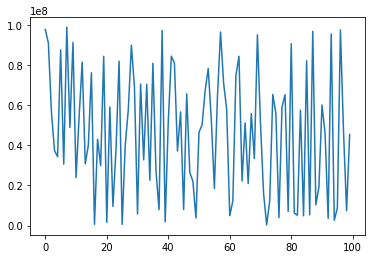

starting show_linear_dependency plot


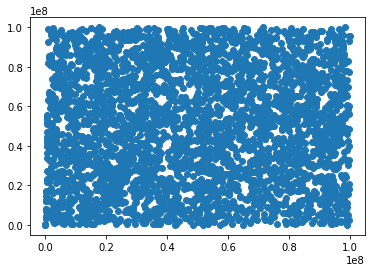

In [241]:
# usually 10 digit numbers are used
x = [57934063]
str_len = len(str(x[0]))
print(str_len)

# if assertion error not passed, please change the number of digits
assert str_len/2%1 == 0
cliper = int(str_len/2)

for i in tqdm(range(10000)):
    squared = str(x[-1]**2).zfill(str_len*2)
    random_num = int(squared[cliper:-cliper])
    
#     print(i, random_num)
    if(random_num in x):
        print("%i, break, number repeated" % i)
        break
    else:
        x.append(random_num)
        
print("max(x): %i, min(x): %i" % (max(x), min(x)))
plot_interval(x)
show_linear_dependency(x)

## NIST randomness beacon

In [477]:
url = 'https://beacon.nist.gov/beacon/2.0/pulse/last'

def response(url):
    with urllib.request.urlopen(url) as response:
        return response.read()

res = response(url)
res = json.loads(res)
# print(res)
print("latest pulse: %s" % res["pulse"]["listValues"][0]["value"])

latest pulse: 05C55046B6BACCEC94399EEA8DE9CA6A17D20980F42FC6FCCDBECC0D5A2CE969C9AFADE4F4BA479242704E522914B129FB69C4BF2E5C878D5C012C8B5012C5C4


## Non Uniform Distribution TEST (Generate Gaussian Dist)

In [478]:
def generate_fibonacci(arr_len = 10000, m = 2**12, num1 = 1279, num2 = 418):
    x = [num1, num2]
    for i in tqdm(range(2,arr_len)):
        random_num = (x[-1]+x[-2])%m
        x.append(random_num)
    return(x)

In [479]:
fib = generate_fibonacci(1000000, 2**32, 234509, 214907)
len(fib)
# convert random numbers to values between -1 & 1
fib = ((np.array(fib)-int(max(fib)/2)-1)*2.002/max(fib))
print(min(fib), max(fib))

-1.00099779289 1.00099999953


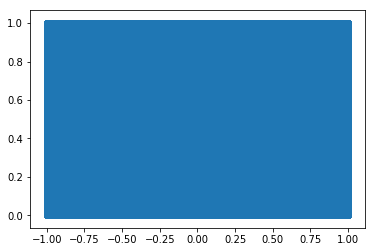

In [480]:
plt.scatter(fib[1:], np.abs(fib[:-1]))
plt.show()

In [481]:
def gaussian_func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

1.00089068945 1.76270385985e-22 False
1.00079051546 1.80004933184e-22 False
1.00048085645 1.89600840295e-22 False
0.999652053432 2.16945886972e-22 False
0.997475303378 3.08302584962e-22 False
0.991773856236 7.69008815553e-22 False
0.976846264863 8.08418943372e-21 False
0.937764937887 2.90060706524e-18 False
0.835448548331 2.13162159948e-12 False
0.567580706641 0.0112050571557 False
62460


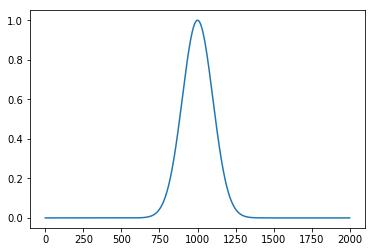

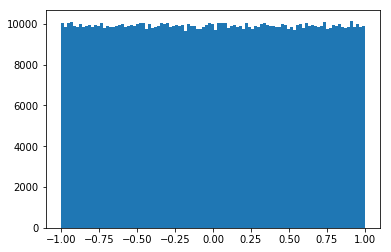

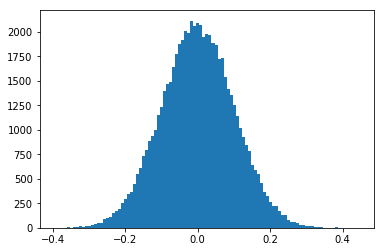

In [482]:
a = 1
b = 0
c = 1

x = []
for i in range(int(len(fib)/2)):
#     x, y
#     fib[1:], np.abs(fib[:-1])

    if(i < 10):
        print(np.abs(fib[i*2]), gaussian_func(fib[i*2+1]*10, a, b, c),
              np.abs(fib[i*2]) < gaussian_func(fib[i*2+1]*10, a, b, c))

    if(np.abs(fib[i*2]) < gaussian_func(fib[i*2+1]*10, a, b, c)):
        x.append(fib[i*2+1])

print(len(x))

# TEST gaussian func
test = []
for i in range(-1000,1000):
    test.append(gaussian_func(i/100, a, b, c))
    
plt.plot(test)
plt.show()

plt.hist(fib, bins= 101);
plt.show()
plt.hist(x, bins= 101);
plt.show()

## Box Muller (Generate Gaussian Dist)

In [483]:
fib = generate_fibonacci(1000000, 2**32, 234509, 214907)

fib = np.array(fib)
fib = fib-min(fib)
fib = fib/max(fib)
print("min(fib): %f, max(fib): %f" % (min(fib), max(fib)))

min(fib): 0.000000, max(fib): 1.000000


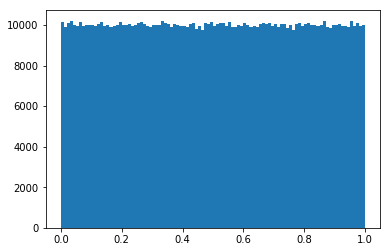

In [484]:
plt.hist(fib, bins=100)
plt.show()

In [485]:
# fib = fib[1000:1010]

In [486]:
x = []
for i in tqdm(range(int(len(fib)/2))):
    omega, roh = 2*np.pi*fib[i], -2*np.log(fib[i+1])
    x1, x2 = np.sqrt(roh)*np.cos(omega), np.sqrt(roh)*np.sin(omega)
    if(np.isfinite(x1)):
        x.append(x1)
    if(np.isfinite(x2)):
        x.append(x2)

/Users/christoph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


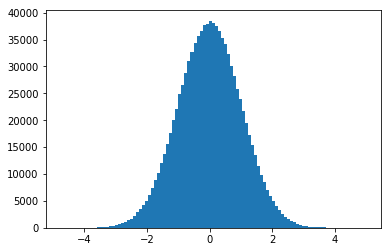

In [487]:
plt.hist(x, bins=101);

## Polarmethode

In [488]:
fib = generate_fibonacci(1000000, 2**32, 234509, 214907)

fib = np.array(fib)
fib = fib-min(fib)
fib = fib/max(fib)
print("min(fib): %f, max(fib): %f" % (min(fib), max(fib)))

min(fib): 0.000000, max(fib): 1.000000


In [489]:
x = []
for i in tqdm(range(int(len(fib)/2))):
    s, t = 2*fib[i]-1, -2*fib[i+1]+1
    w = s**2+t**2
    if(w < 1):
        x1, x2 = s/w*np.sqrt(-2*np.log(w**2)), t/w*np.sqrt(-2*np.log(w**2))
        if(np.isfinite(x1)):
            x.append(x1)
        if(np.isfinite(x2)):
            x.append(x2)

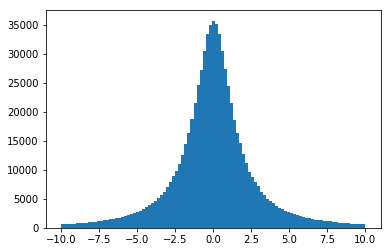

In [495]:
x = np.array(x)
plt.hist(x[(x>-10) & (x<10)], bins=101);

### Ganzzahlig

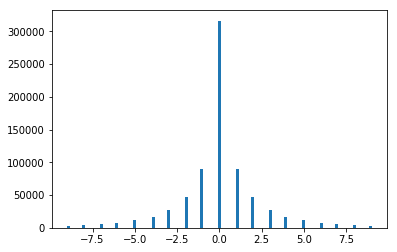

In [498]:
x = x.astype(int)
plt.hist(x[(x>-10) & (x<10)], bins=101);